**Importing all the necessary packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

**Loading, normalizing and pre-processing the image data**

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to [0, 1] range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Print dataset shapes for verification
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train_cat.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test_cat.shape}")

x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


**Define the CNN model architecture**

In [ ]:
# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Training the CNN model**

In [ ]:
# Train the model
history = model.fit(x_train, y_train_cat, epochs=10,
                    validation_data=(x_test, y_test_cat),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 76ms/step - accuracy: 0.3397 - loss: 1.7893 - val_accuracy: 0.5419 - val_loss: 1.2749
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.5631 - loss: 1.2346 - val_accuracy: 0.5975 - val_loss: 1.1229
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.6179 - loss: 1.0778 - val_accuracy: 0.6504 - val_loss: 0.9984
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 73ms/step - accuracy: 0.6623 - loss: 0.9496 - val_accuracy: 0.6627 - val_loss: 0.9659
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.6872 - loss: 0.8841 - val_accuracy: 0.6583 - val_loss: 0.9740
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7121 - loss: 0.8156 - val_accuracy: 0.6799 - val_loss: 0.9092
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.7316 - loss: 0.7674 - val_accuracy: 0.6995 - val_loss: 0.8831
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 74ms/step - accuracy: 0.7502 - loss: 0.7191 - 

**Evaluating the CNN model**

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7040 - loss: 0.8752

Test accuracy: 0.7017


**Plotting Train Vs Test accuracy**

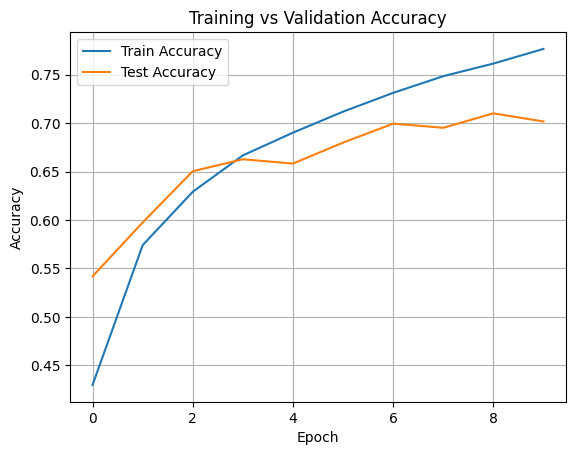

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

As the number of training epochs increased, the model learned more complex patterns from the training data, resulting in a steady improvement in training accuracy from 40% to 80% between epoch 0 and epoch 10. However, the test accuracy plateaued at around 70%, indicating that the model was not generalizing as well to unseen data. This discrepancy suggests overfitting, the model performs well on training data but struggles to maintain the same level of performance on the validation/test data. Overfitting occurs when the model memorizes training examples rather than learning generalizable features.


**Confusion matrix and classification report**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1000
           1       0.87      0.77      0.82      1000
           2       0.54      0.62      0.58      1000
           3       0.56      0.46      0.51      1000
           4       0.65      0.66      0.66      1000
           5       0.68      0.54      0.60      1000
           6       0.66      0.88      0.75      1000
           7       0.79      0.73      0.76      1000
           8       0.77      0.85      0.81      1000
           9       0.71      0.85      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



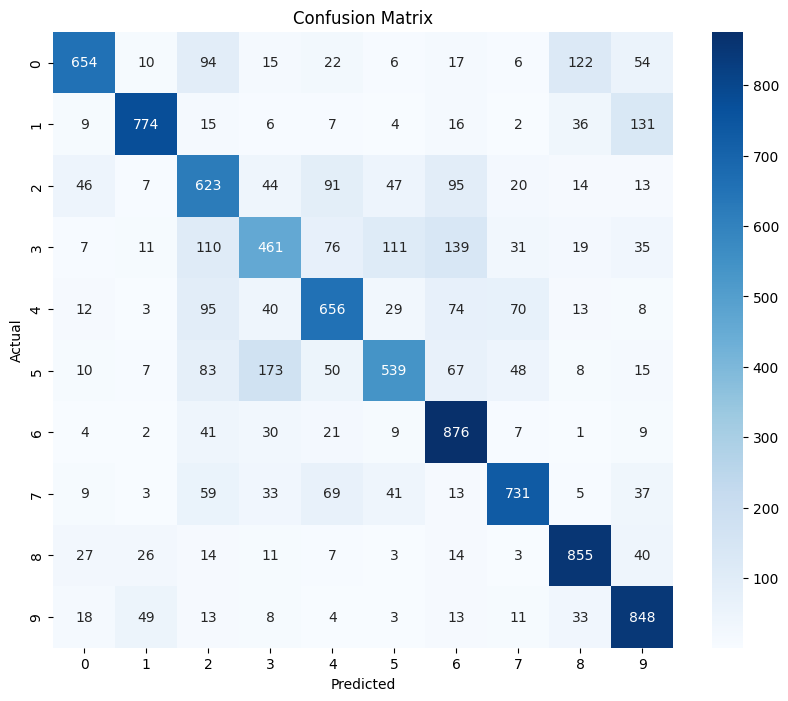

In [ ]:
# Generate predictions and convert back from one-hot
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Visualizing sample predictions using the CNN model**

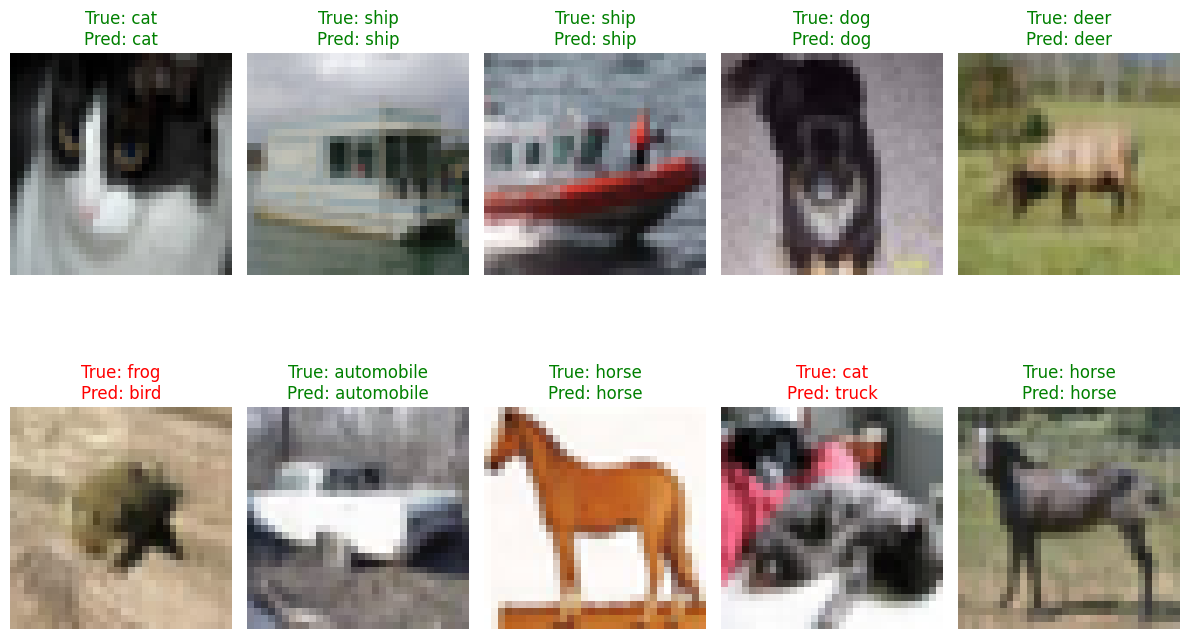

In [ ]:
# Show some test images with their predicted and true labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 8))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()